In [82]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CombinedBettingData2.csv')
df.head()

,Unnamed: 0,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,...,Pinnacle Sports,5Dimes,Bookmaker,BetOnline,Bovada,Heritage,Intertops,YouWager,JustBet,Sportsbetting
0,0,LAC,GSW,31.0,19.0,0.620,43.0,7.0,0.860,2017-02-02,...,-7.5,-7.5,-7.5,-7.5,-8.5,-8.0,-7.5,-8.0,-7.5,-7.5
1,1,PHX,LAC,15.0,34.0,0.306,31.0,18.0,0.633,2017-02-01,...,-2.5,-2.5,-2.5,-2.5,-3.0,-2.5,-2.5,-2.5,-2.5,-2.5
2,2,PHI,LAC,16.0,27.0,0.372,30.0,17.0,0.638,2017-01-24,...,-4.5,-4.5,-4.5,-4.5,-5.0,-4.5,-4.5,-4.5,-4.5,-4.5
3,3,ATL,LAC,26.0,19.0,0.578,30.0,16.0,0.652,2017-01-23,...,7.0,7.0,7.5,7.5,8.0,7.5,7.5,7.5,7.5,7.5
4,4,LAC,LAL,28.0,14.0,0.667,15.0,29.0,0.341,2017-01-14,...,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5


In [83]:
df = df.drop(['Unnamed: 0'], axis=1)
df.columns

Index(['HomeTeam', 'AwayTeam', 'HTWin', 'HTLoss', 'HT%', 'ATWin', 'ATLoss',
       'AT%', 'Date', 'WinMargin', 'Pinnacle Sports', '5Dimes', 'Bookmaker',
       'BetOnline', 'Bovada', 'Heritage', 'Intertops', 'YouWager', 'JustBet',
       'Sportsbetting'],
      dtype='object')

In [84]:
df = df.dropna()
df['average'] = (df['Pinnacle Sports'] + df['5Dimes'] + df['Bookmaker'] + df['BetOnline'] + df['Bovada'] + df['Heritage'] + df['Intertops'] + df['YouWager'] + df['JustBet'] + df['Sportsbetting'])/10
df.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,WinMargin,...,5Dimes,Bookmaker,BetOnline,Bovada,Heritage,Intertops,YouWager,JustBet,Sportsbetting,average
0,LAC,GSW,31.0,19.0,0.620,43.0,7.0,0.860,2017-02-02,-13,...,-7.5,-7.5,-7.5,-8.5,-8.0,-7.5,-8.0,-7.5,-7.5,-7.70
1,PHX,LAC,15.0,34.0,0.306,31.0,18.0,0.633,2017-02-01,-10,...,-2.5,-2.5,-2.5,-3.0,-2.5,-2.5,-2.5,-2.5,-2.5,-2.55
2,PHI,LAC,16.0,27.0,0.372,30.0,17.0,0.638,2017-01-24,11,...,-4.5,-4.5,-4.5,-5.0,-4.5,-4.5,-4.5,-4.5,-4.5,-4.55
3,ATL,LAC,26.0,19.0,0.578,30.0,16.0,0.652,2017-01-23,-10,...,7.0,7.5,7.5,8.0,7.5,7.5,7.5,7.5,7.5,7.45
4,LAC,LAL,28.0,14.0,0.667,15.0,29.0,0.341,2017-01-14,16,...,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.50


In [85]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['Weekday'] = df['Date'].dt.dayofweek
df = df.sort_values(by=['Date'])
df = df.reset_index()
df.head()

,index,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,...,Heritage,Intertops,YouWager,JustBet,Sportsbetting,average,Year,Month,Week,Weekday
0,2660,OKC,ORL,1.0,0.0,1.0,0.0,1.0,0.0,2011-12-25,...,8.0,7.5,7.5,7.5,7.5,7.55,2011,12,51,6
1,4636,NYK,BOS,1.0,0.0,1.0,0.0,1.0,0.0,2011-12-25,...,4.5,4.5,5.0,4.5,5.0,4.70,2011,12,51,6
2,652,DAL,MIA,0.0,1.0,0.0,1.0,0.0,1.0,2011-12-25,...,-5.0,-4.5,-4.5,-4.5,-5.0,-4.75,2011,12,51,6
3,4837,GSW,LAC,0.0,1.0,0.0,1.0,0.0,1.0,2011-12-25,...,-4.0,-4.5,-4.5,-4.5,-5.0,-4.70,2011,12,51,6
4,657,LAL,CHI,0.0,1.0,0.0,1.0,0.0,1.0,2011-12-25,...,-5.0,-5.0,-5.0,-5.5,-5.5,-5.25,2011,12,51,6


In [86]:
cols_at_end = ['WinMargin']
df = df[[c for c in df if c not in cols_at_end] + [c for c in cols_at_end if c in df]]

In [87]:
team = df.HomeTeam.unique()
team_dict = dict(zip(team, range(len(team))))
df1 = df.copy(deep=True)
df1 = df1.replace({'HomeTeam': team_dict})
df1 = df1.replace({'AwayTeam': team_dict})
df1 = df1.drop(['Date','index'], axis=1)
df1.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Pinnacle Sports,5Dimes,...,Intertops,YouWager,JustBet,Sportsbetting,average,Year,Month,Week,Weekday,WinMargin
0,0,7,1.0,0.0,1.0,0.0,1.0,0.0,7.5,7.5,...,7.5,7.5,7.5,7.5,7.55,2011,12,51,6,8
1,1,25,1.0,0.0,1.0,0.0,1.0,0.0,4.5,4.5,...,4.5,5.0,4.5,5.0,4.70,2011,12,51,6,2
2,2,17,0.0,1.0,0.0,1.0,0.0,1.0,-4.5,-4.5,...,-4.5,-4.5,-4.5,-5.0,-4.75,2011,12,51,6,-11
3,3,27,0.0,1.0,0.0,1.0,0.0,1.0,-4.5,-4.5,...,-4.5,-4.5,-4.5,-5.0,-4.70,2011,12,51,6,-19
4,4,28,0.0,1.0,0.0,1.0,0.0,1.0,-5.0,-5.5,...,-5.0,-5.0,-5.5,-5.5,-5.25,2011,12,51,6,-1


In [88]:
df1.loc[df1['WinMargin'] > df1['average'], 'Over'] = 1
df1.loc[df1['WinMargin'] <= df1['average'], 'Over'] = 0

In [89]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df1.columns
sc2 = StandardScaler()
df1 = df1.dropna()
df2 = df1.copy(deep=True)
for col in cols:
    df2[[col]] = sc2.fit_transform(df2[[col]])
df2.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Pinnacle Sports,5Dimes,...,YouWager,JustBet,Sportsbetting,average,Year,Month,Week,Weekday,WinMargin,Over
0,-1.618782,-0.871963,-1.329239,-1.387284,2.569019,-1.400287,-1.328754,-2.592875,0.698551,0.698655,...,0.696702,0.698385,0.701321,0.706162,-1.909198,1.508709,1.538777,1.528771,0.385654,1.019510
1,-1.511539,1.058493,-1.329239,-1.387284,2.569019,-1.400287,-1.328754,-2.592875,0.236477,0.237693,...,0.314582,0.237108,0.317511,0.269420,-1.909198,1.508709,1.538777,1.528771,-0.059762,-0.980863
2,-1.404297,0.200512,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.149745,-1.145193,...,-1.137474,-1.146723,-1.217728,-1.178727,-1.909198,1.508709,1.538777,1.528771,-1.024829,-0.980863
3,-1.297054,1.272988,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.149745,-1.145193,...,-1.137474,-1.146723,-1.217728,-1.171065,-1.909198,1.508709,1.538777,1.528771,-1.618717,-0.980863
4,-1.189812,1.380235,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.226757,-1.298847,...,-1.213898,-1.300482,-1.294490,-1.255349,-1.909198,1.508709,1.538777,1.528771,-0.282470,1.019510


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


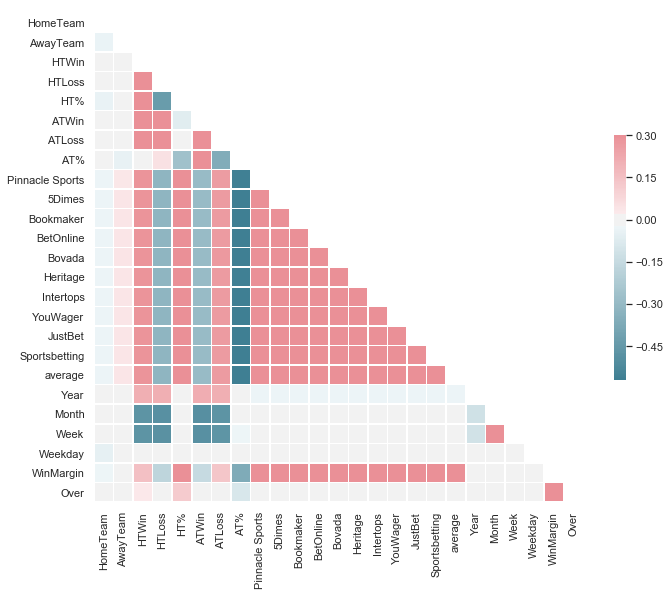

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D 

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

## Data Clustering

In [91]:
def plot_embedding(X, y, title=None, num=10):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/num))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [92]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [95]:
df2 = df2.drop(['WinMargin','Over'], axis=1)
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Pinnacle Sports,5Dimes,...,Heritage,Intertops,YouWager,JustBet,Sportsbetting,average,Year,Month,Week,Weekday
0,-1.618782,-0.871963,-1.329239,-1.387284,2.569019,-1.400287,-1.328754,-2.592875,0.698551,0.698655,...,0.772207,0.700096,0.696702,0.698385,0.701321,0.706162,-1.909198,1.508709,1.538777,1.528771
1,-1.511539,1.058493,-1.329239,-1.387284,2.569019,-1.400287,-1.328754,-2.592875,0.236477,0.237693,...,0.236343,0.239199,0.314582,0.237108,0.317511,0.269420,-1.909198,1.508709,1.538777,1.528771
2,-1.404297,0.200512,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.149745,-1.145193,...,-1.218145,-1.143495,-1.137474,-1.146723,-1.217728,-1.178727,-1.909198,1.508709,1.538777,1.528771
3,-1.297054,1.272988,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.149745,-1.145193,...,-1.065041,-1.143495,-1.137474,-1.146723,-1.217728,-1.171065,-1.909198,1.508709,1.538777,1.528771
4,-1.189812,1.380235,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.226757,-1.298847,...,-1.218145,-1.220311,-1.213898,-1.300482,-1.294490,-1.255349,-1.909198,1.508709,1.538777,1.528771


In [96]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#subSpace = TSNE().fit_transform(df2.values)
subSpace = PCA().fit_transform(df2.values)

### K-Means

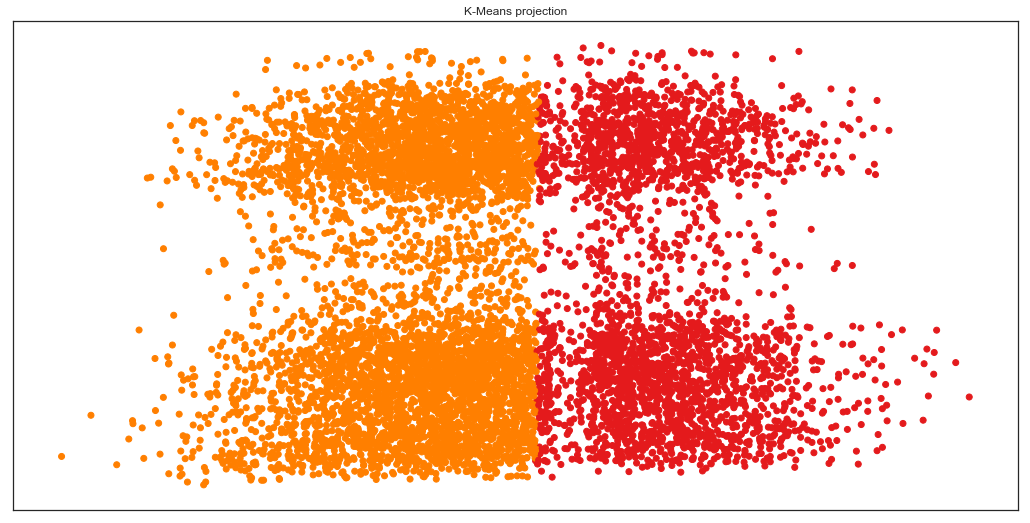

In [98]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=2, max_iter= 10000, n_init=100).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'K-Means projection',2)

In [99]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Pinnacle Sports,5Dimes,...,Intertops,YouWager,JustBet,Sportsbetting,average,Year,Month,Week,Weekday,label
0,-1.618782,-0.871963,-1.329239,-1.387284,2.569019,-1.400287,-1.328754,-2.592875,0.698551,0.698655,...,0.700096,0.696702,0.698385,0.701321,0.706162,-1.909198,1.508709,1.538777,1.528771,1
1,-1.511539,1.058493,-1.329239,-1.387284,2.569019,-1.400287,-1.328754,-2.592875,0.236477,0.237693,...,0.239199,0.314582,0.237108,0.317511,0.269420,-1.909198,1.508709,1.538777,1.528771,1
2,-1.404297,0.200512,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.149745,-1.145193,...,-1.143495,-1.137474,-1.146723,-1.217728,-1.178727,-1.909198,1.508709,1.538777,1.528771,0
3,-1.297054,1.272988,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.149745,-1.145193,...,-1.143495,-1.137474,-1.146723,-1.217728,-1.171065,-1.909198,1.508709,1.538777,1.528771,0
4,-1.189812,1.380235,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.226757,-1.298847,...,-1.220311,-1.213898,-1.300482,-1.294490,-1.255349,-1.909198,1.508709,1.538777,1.528771,0


In [101]:
from sklearn.metrics import accuracy_score
accuracy =  accuracy_score(df4['label'].values, df1['Over'].values) * 100
print('The cluster accuracy is ' + str(accuracy))

The cluster accuracy is 49.8992532890838


### Agglomerative Clustering

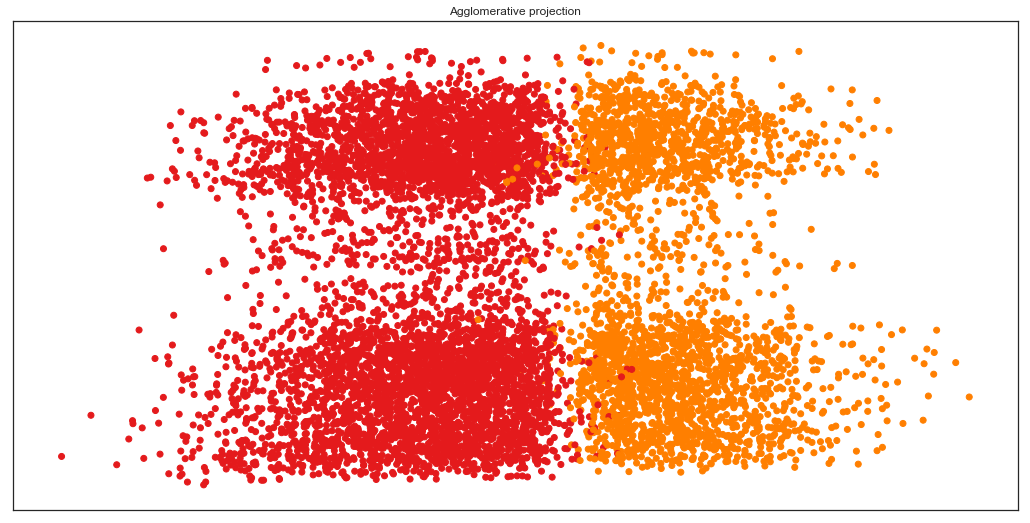

In [102]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'Agglomerative projection',2)

In [103]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Pinnacle Sports,5Dimes,...,Intertops,YouWager,JustBet,Sportsbetting,average,Year,Month,Week,Weekday,label
0,-1.618782,-0.871963,-1.329239,-1.387284,2.569019,-1.400287,-1.328754,-2.592875,0.698551,0.698655,...,0.700096,0.696702,0.698385,0.701321,0.706162,-1.909198,1.508709,1.538777,1.528771,0
1,-1.511539,1.058493,-1.329239,-1.387284,2.569019,-1.400287,-1.328754,-2.592875,0.236477,0.237693,...,0.239199,0.314582,0.237108,0.317511,0.269420,-1.909198,1.508709,1.538777,1.528771,0
2,-1.404297,0.200512,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.149745,-1.145193,...,-1.143495,-1.137474,-1.146723,-1.217728,-1.178727,-1.909198,1.508709,1.538777,1.528771,1
3,-1.297054,1.272988,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.149745,-1.145193,...,-1.143495,-1.137474,-1.146723,-1.217728,-1.171065,-1.909198,1.508709,1.538777,1.528771,1
4,-1.189812,1.380235,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.226757,-1.298847,...,-1.220311,-1.213898,-1.300482,-1.294490,-1.255349,-1.909198,1.508709,1.538777,1.528771,1


In [105]:
from sklearn.metrics import accuracy_score
accuracy =  accuracy_score(df4['label'].values, df1['Over'].values) * 100
print('The cluster accuracy is ' + str(accuracy))

The cluster accuracy is 50.52743866303189


### Affinity Propagation

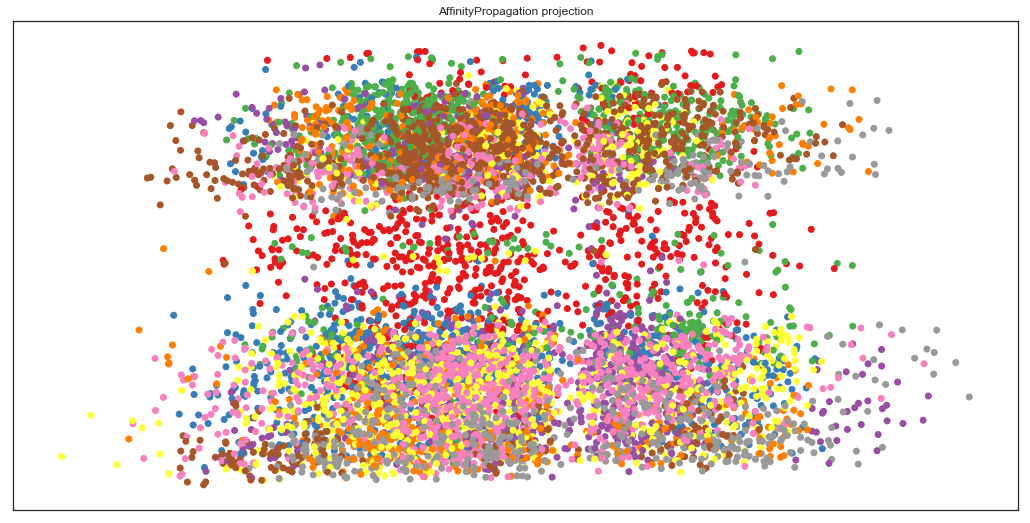

In [109]:
from sklearn.cluster import AffinityPropagation
cluster = AffinityPropagation(convergence_iter=15).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'AffinityPropagation projection',280)

In [110]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Pinnacle Sports,5Dimes,...,Intertops,YouWager,JustBet,Sportsbetting,average,Year,Month,Week,Weekday,label
0,-1.618782,-0.871963,-1.329239,-1.387284,2.569019,-1.400287,-1.328754,-2.592875,0.698551,0.698655,...,0.700096,0.696702,0.698385,0.701321,0.706162,-1.909198,1.508709,1.538777,1.528771,27
1,-1.511539,1.058493,-1.329239,-1.387284,2.569019,-1.400287,-1.328754,-2.592875,0.236477,0.237693,...,0.239199,0.314582,0.237108,0.317511,0.269420,-1.909198,1.508709,1.538777,1.528771,27
2,-1.404297,0.200512,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.149745,-1.145193,...,-1.143495,-1.137474,-1.146723,-1.217728,-1.178727,-1.909198,1.508709,1.538777,1.528771,29
3,-1.297054,1.272988,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.149745,-1.145193,...,-1.143495,-1.137474,-1.146723,-1.217728,-1.171065,-1.909198,1.508709,1.538777,1.528771,29
4,-1.189812,1.380235,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.226757,-1.298847,...,-1.220311,-1.213898,-1.300482,-1.294490,-1.255349,-1.909198,1.508709,1.538777,1.528771,29
